# 모두를 위한 딥러닝 week 2

# Tensorflow for logistic classifiers

Jimin Sun

In [1]:
import tensorflow as tf

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Example from lab video

In [2]:
x_data = [[1,2], [2,3], [3,1], [4,4], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [3]:
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1]) # Shape에 주의!

In [4]:
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
# 들어오는 값 2개, 나가는 값 1개.
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [5]:
hypothesis = tf.sigmoid(tf.matmul(X, W)+b)
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [6]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)

In [7]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

What is 'reduce_mean'?
* tf.reduce_mean 은 평균을 구해주는 operation을 한다. (np.mean과 같은 기능!)
* 둘의 차이점은, numpy operation은 파이썬 어디서든 사용할 수 있지만, tensorflow operation은 tensorflow **Session** 내에서만 동작한다는 데에 있다.
* But why **reduce**_mean?

> The key here is the word reduce, a concept from functional programming, which makes it possible for reduce_mean in TensorFlow to keep a running average of the results of computations from a batch of inputs.

> 출처 : https://stackoverflow.com/questions/34236252/difference-between-np-mean-and-tf-reduce-mean-in-numpy-and-tensorflow

> 참고 #1. https://www.python-course.eu/lambda.php

> 참고 #2. https://www.python-course.eu/python3_lambda.php

<img src="reduce.png" height="70%" width="70%">

<img src='reduce_2.png' height="70%" width="70%">

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
        
    # Accuracy
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict = {X: x_data, Y: y_data})
    print("\nHypothesis: \n", h, "\nCorrect (Y): \n", c, "\nAccuracy: \n", a)

0 0.585211
1000 0.387248
2000 0.313725
3000 0.261586
4000 0.223239
5000 0.194146
6000 0.17146
7000 0.153347
8000 0.13859
9000 0.126357
10000 0.116064

Hypothesis: 
 [[ 0.0268787 ]
 [ 0.16871433]
 [ 0.21446182]
 [ 0.86153394]
 [ 0.93646842]
 [ 0.97216052]] 
Correct (Y): 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]] 
Accuracy: 
 1.0


## Let's apply this classifier to another example!

The same dataset from JaeYoung's example last week :)

Where to get it : https://www.kaggle.com/c/uci-wine-quality-dataset/data

In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('winequality-data.csv', dtype = 'float32', header=0)

In [11]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6.0,981.0
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7.0,982.0
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5.0,983.0
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7.0,984.0
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5.0,985.0


## Binary Classifier

Here, you can spot the **'quality'** column, where the quality of wine is classified to 7 categories.

In [12]:
data['quality'].unique()

array([ 6.,  7.,  5.,  8.,  4.,  3.,  9.])

We'll start from a binary classifier, so we label 

* wines of quality 3.0, 4.0, 5.0 as class 0,
* and wines of quality 6.0, 7.0, 8.0, 9.0 as class 1.

In [13]:
data.info() 
# You can easily check if there are any missing values in your data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float32
volatile.acidity        3918 non-null float32
citric.acid             3918 non-null float32
residual.sugar          3918 non-null float32
chlorides               3918 non-null float32
free.sulfur.dioxide     3918 non-null float32
total.sulfur.dioxide    3918 non-null float32
density                 3918 non-null float32
pH                      3918 non-null float32
sulphates               3918 non-null float32
alcohol                 3918 non-null float32
quality                 3918 non-null float32
id                      3918 non-null float32
dtypes: float32(13)
memory usage: 199.0 KB


In [14]:
grade = data['quality'] > 5.0
data['grade'] = grade.astype(np.float32)

In [15]:
data.head()
# new column 'grade' is added at the end

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id,grade
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6.0,981.0,1.0
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7.0,982.0,1.0
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5.0,983.0,0.0
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7.0,984.0,1.0
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5.0,985.0,0.0


In [16]:
y_data = data.values[:,[-1]]
x_data = data.values[:,:-3] # columns quality, id, grade are excluded

In [17]:
y_data.shape, x_data.shape

((3918, 1), (3918, 11))

In [18]:
X = tf.placeholder(tf.float32, shape = [None, 11])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [19]:
W = tf.Variable(tf.random_normal([11,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

In [20]:
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [21]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    for step in range(1001):
        cost_val, _ = sess.run([cost, train], feed_dict = feed)
        if step % 100 == 0:
            print(step, cost_val)
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = feed)
    print('\nHypothesis: \n', h, '\nCorrect (Y)\n: ',c, '\nAccuracy\n:', a)

0 nan
100 nan
200 nan
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan

Hypothesis: 
 [[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]] 
Correct (Y)
:  [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]] 
Accuracy
: 0.335375


???????

## Data normalization was needed!

There are many ways to normalize (= change scales to $[0,1]$) data, but this time we'll use **min_max_normalization**. 

The idea here is to apply this formula below.


$$min\_max(x_{ij}) = \dfrac{x_{ij} - min_{1 \leq i \leq n}(x_{ij})}{(max_{1 \leq i \leq n}(x_{ij})-min_{1 \leq i \leq n}(x_{ij}))}$$



* $min_{1 \leq i \leq n}(x_{ij})$ : $j$ 번째 열에서 가장 **작은** 데이터값
* $max_{1 \leq i \leq n}(x_{ij})$ : $j$ 번째 열에서 가장 **큰** 데이터값

데이터에서 가장 작은 값은 0, 데이터에서 가장 큰 값은 1로 변환시킨다.

In [23]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0) # axis=0 : 열, axis=1 : 행
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [24]:
x_data = min_max_normalized(x_data)

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X: x_data, Y: y_data}
    for step in range(20001):
        cost_val, _ = sess.run([cost, train], feed_dict = feed)
        if step % 2000 == 0:
            print(step, cost_val)
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = feed)
    print('\nHypothesis: \n', h, '\nCorrect (Y)\n: ',c, '\nAccuracy\n:', a)

0 1.53646
2000 0.611673
4000 0.596641
6000 0.585185
8000 0.576219
10000 0.569024
12000 0.563115
14000 0.558161
16000 0.553931
18000 0.550264
20000 0.547041

Hypothesis: 
 [[ 0.83623403]
 [ 0.87260079]
 [ 0.53597355]
 ..., 
 [ 0.79522443]
 [ 0.75276494]
 [ 0.38663006]] 
Correct (Y)
:  [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 0.]] 
Accuracy
: 0.701634


Even after 20,000 steps, the accuracy doesn't look high enough. $(\approx 70\%)$

### Why?

Let's plot the data, and see if we can find a reason there.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id,grade
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6.0,981.0,1.0
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7.0,982.0,1.0
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5.0,983.0,0.0
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7.0,984.0,1.0
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5.0,985.0,0.0


In [28]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id,grade
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854616,0.278027,0.333201,6.405811,0.045566,35.326187,138.395233,0.994025,3.187989,0.489704,10.518758,5.877489,2939.500000,0.664625
std,0.841879,0.100459,0.121375,5.107975,0.021138,17.158062,42.996830,0.003025,0.150022,0.114186,1.237195,0.890356,1131.174316,0.472183
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000,0.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000,1.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000,1.000000
max,14.200000,1.100000,1.660000,65.800003,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000,1.000000


*The variance of most columns seem extremely low.*

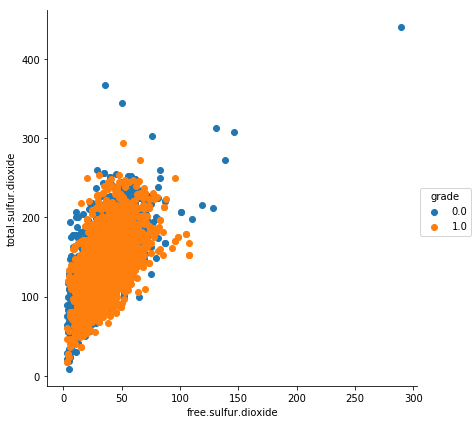

In [29]:
sns.FacetGrid(data, hue = 'grade', size=6).map(plt.scatter, 'free.sulfur.dioxide', 'total.sulfur.dioxide').add_legend()
plt.show()

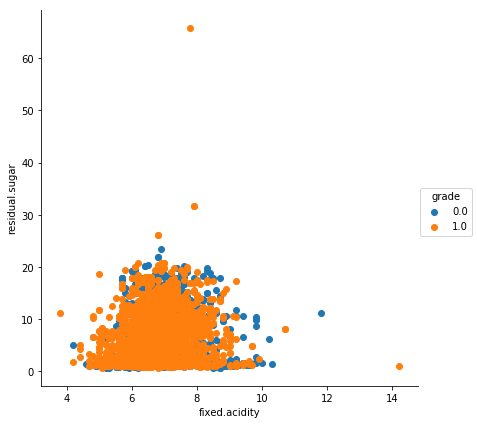

In [30]:
sns.FacetGrid(data, hue = 'grade', size=6).map(plt.scatter, 'fixed.acidity', 'residual.sugar').add_legend()
plt.show()

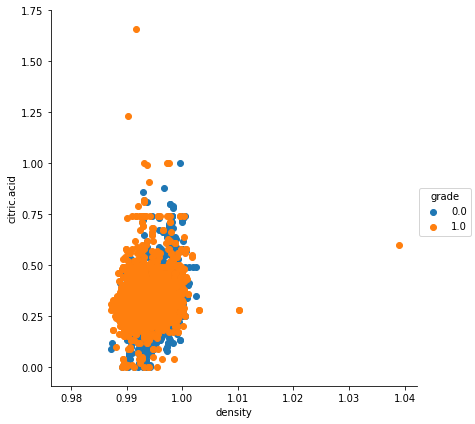

In [31]:
sns.FacetGrid(data, hue = 'grade', size=6).map(plt.scatter, 'density', 'citric.acid').add_legend()
plt.show()

The data itself doesn't really seem linearly separable :(

This kind of problem will lead us to our next session in the lecture, such as Neural Networks!

## Multiclass classifier

### Example from lab video
A quick review of the example dealt in the lecture.

In [32]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

In [33]:
xy

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  3.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  6.],
       [ 0.,  1.,  1., ...,  0.,  0.,  1.]], dtype=float32)

In [34]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [35]:
# nb_classes = 7

# For cases when you don't want to set a specific number to 'nb_classes', 
# or if you don't exactly know the number of categories ,
# this might be a more generalized method.

np.unique(y_data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.], dtype=float32)

In [36]:
nb_classes = len(np.unique(y_data))

In [37]:
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])
Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [38]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [39]:
logits = tf.matmul(X, W)+b
hypothesis = tf.nn.softmax(logits)

In [40]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, 
                                                 labels = Y_one_hot)

In [41]:
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [42]:
prediction = tf.argmax(hypothesis, 1)
# tf.argmax : Returns the index with the largest value across axes of a tensor.
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
        
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy],
                                 feed_dict = {X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
    
    pred = sess.run(prediction, feed_dict = {X: x_data})
    
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 5.291	Acc: 5.94%
Step:   100	Loss: 0.779	Acc: 80.20%
Step:   200	Loss: 0.459	Acc: 82.18%
Step:   300	Loss: 0.333	Acc: 90.10%
Step:   400	Loss: 0.264	Acc: 93.07%
Step:   500	Loss: 0.218	Acc: 97.03%
Step:   600	Loss: 0.186	Acc: 98.02%
Step:   700	Loss: 0.162	Acc: 98.02%
Step:   800	Loss: 0.143	Acc: 98.02%
Step:   900	Loss: 0.128	Acc: 98.02%
Step:  1000	Loss: 0.115	Acc: 98.02%
Step:  1100	Loss: 0.105	Acc: 98.02%
Step:  1200	Loss: 0.097	Acc: 100.00%
Step:  1300	Loss: 0.089	Acc: 100.00%
Step:  1400	Loss: 0.083	Acc: 100.00%
Step:  1500	Loss: 0.078	Acc: 100.00%
Step:  1600	Loss: 0.073	Acc: 100.00%
Step:  1700	Loss: 0.069	Acc: 100.00%
Step:  1800	Loss: 0.065	Acc: 100.00%
Step:  1900	Loss: 0.061	Acc: 100.00%
Step:  2000	Loss: 0.058	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 

In [44]:
true_y = y_data.flatten()

In [45]:
unique, counts = np.unique(pred, return_counts=True)
dict(zip(unique, counts))

{0: 41, 1: 20, 2: 5, 3: 13, 4: 4, 5: 8, 6: 10}

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [47]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.arange(0,7)
    pred_labels = np.arange(0,7)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 5
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size

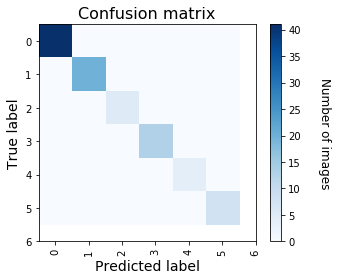

In [48]:
plot_confusion_matrix(true_y,pred)

### Back to our wine quality dataset!

In [49]:
x_data = data.values[:,:-3]
x_data = min_max_normalized(x_data)
x_data

array([[ 0.27884614,  0.06862746,  0.22891566, ...,  0.3301886 ,
         0.36046508,  0.54838705],
       [ 0.27884614,  0.35294119,  0.186747  , ...,  0.51886791,
         0.46511629,  0.74193555],
       [ 0.22115386,  0.0882353 ,  0.12650602, ...,  0.31132069,
         0.22093022,  0.27419353],
       ..., 
       [ 0.46153849,  0.09803922,  0.16867471, ...,  0.23584907,
         0.18604651,  0.50000006],
       [ 0.25000003,  0.13725491,  0.22891566, ...,  0.21698116,
         0.09302327,  0.48387098],
       [ 0.32692307,  0.37254903,  0.39156625, ...,  0.3962265 ,
         0.23255812,  0.1129032 ]], dtype=float32)

In [50]:
y_data = (data.values[:,[-3]]).astype(np.int32) # quality column으로 다시 설정

In [51]:
x_data.shape, y_data.shape

((3918, 11), (3918, 1))

In [52]:
num_class = len(data['quality'].unique())
num_class

7

In [53]:
X = tf.placeholder(tf.float32, [None, 11])
Y = tf.placeholder(tf.int32, [None, 1])

In [54]:
Y_one_hot = tf.one_hot(Y, num_class) # one hot
Y_one_hot = tf.reshape(Y_one_hot, [-1, num_class])

In [55]:
W = tf.Variable(tf.random_normal([11, num_class]), name = 'weight')
b = tf.Variable(tf.random_normal([num_class]), name = 'bias')

In [56]:
logits = tf.matmul(X, W)+b
hypothesis = tf.nn.softmax(logits)

In [57]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, 
                                                 labels = Y_one_hot)

In [58]:
cost = tf.reduce_mean(cost_i)

In [59]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [60]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [61]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10000):
        sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], 
                                 feed_dict = {X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    pred = sess.run(prediction, feed_dict = {X: x_data})


#    for p, y in zip(pred, y_data.flatten()):
#        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))         

Step:     0	Loss: 1.419	Acc: 20.34%
Step:  1000	Loss: 0.801	Acc: 43.06%
Step:  2000	Loss: 0.771	Acc: 43.85%
Step:  3000	Loss: 0.760	Acc: 44.10%
Step:  4000	Loss: 0.754	Acc: 44.87%
Step:  5000	Loss: 0.749	Acc: 45.02%
Step:  6000	Loss: 0.745	Acc: 45.18%
Step:  7000	Loss: 0.742	Acc: 45.56%
Step:  8000	Loss: 0.739	Acc: 45.92%
Step:  9000	Loss: 0.736	Acc: 46.63%


In [62]:
pred_y = pred.astype(np.int32)
pred_y

array([6, 6, 6, ..., 6, 6, 6], dtype=int32)

In [63]:
actual_y = y_data.flatten().astype(np.int32)
actual_y

array([6, 7, 5, ..., 5, 7, 5], dtype=int32)

In [64]:
np.unique(pred_y)

array([5, 6], dtype=int32)

In [65]:
np.unique(actual_y)

array([3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [66]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.arange(3,10)
    pred_labels = np.arange(3,10)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 5
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size

Accuracy: 47.0%


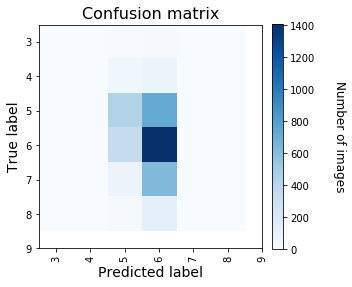

In [67]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(actual_y,pred_y)*100))
plot_confusion_matrix(actual_y,pred_y)

In [68]:
data['quality'].value_counts()

6.0    1752
5.0    1163
7.0     707
8.0     140
4.0     134
3.0      17
9.0       5
Name: quality, dtype: int64

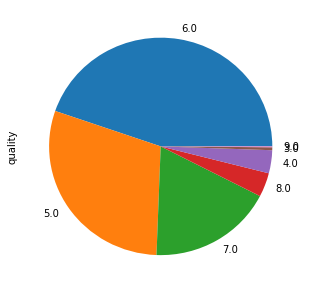

In [69]:
data['quality'].value_counts().plot.pie(subplots=False)
plt.show()

It seems that the classifier has assigned most data points to the class 5 and 6, since these two took up 75% of all classes. :(

In [70]:
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3']

In [71]:
print(set(zip(alist, blist)))

{('a2', 'b2'), ('a3', 'b3'), ('a1', 'b1')}
